# <center> Covid19 Vaccine Sentiment Analysis </center>


# Table Of Contents:
1. [Importing Libraries](#1)
2. [EDA and Visulation](#11)
3. [Text Processing](#2)
4. [Most Prevalent Words in Tweet](#3)
5. [Apply VADER Sentiment to the tweets to get labels](#4)
6. [Time Series Analysis On Sentiments](#5)
7. [Stop Word Removal and Lemmatization](#6)
8. [Splitting the Data](#7)
9. [Feature Extraction](#8)
10. [Model Building](#9)
11. [Conclusion](#10)


# 1. Importing Libraries  <a id='1'></a>

In [1]:

import numpy as np 
import pandas as pd 
import re
import string


import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from collections import Counter
from plotly.subplots import make_subplots
from matplotlib import rcParams

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
from nltk.stem import SnowballStemmer
from wordcloud import WordCloud, STOPWORDS

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv('vaccination_tweets.csv')          # Dataset Source : kaggle
# Note: some functionalities differ from google colab and jupyter notebook

# 2. EDA & Visualisation <a id='11'></a>

## 2.1 Summary statistics <a id='1.1'></a>

In [3]:
df.head()

id             user_name              user_location  \
0  1340539111971516416            Rachel Roh  La Crescenta-Montrose, CA   
1  1338158543359250433           Albert Fong          San Francisco, CA   
2  1337858199140118533              eli🇱🇹🇪🇺👌                   Your Bed   
3  1337855739918835717         Charles Adler     Vancouver, BC - Canada   
4  1337854064604966912  Citizen News Channel                        NaN   

                                    user_description         user_created  \
0  Aggregator of Asian American news; scanning di...  2009-04-08 17:52:46   
1  Marketing dude, tech geek, heavy metal & '80s ...  2009-09-21 15:27:30   
2                                     heil, hydra 🖐☺  2020-06-25 23:30:28   
3  Hosting "CharlesAdlerTonight" Global News Radi...  2008-09-10 11:28:53   
4  Citizen News Channel bringing you an alternati...  2020-04-23 17:58:42   

   user_followers  user_friends  user_favourites  user_verified  \
0             405          1692             3247          False   
1             834           666              178          False   
2              10            88              155          False   
3           49165          3933            21853           True   
4             152           580             1473          False   

                  date                                               text  \
0  2020-12-20 06:06:44  Same folks said daikon paste could treat a cyt...   
1  2020-12-13 16:27:13  While the world has been on the wrong side of ...   
2  2020-12-12 20:33:45  #coronavirus #SputnikV #AstraZeneca #PfizerBio...   
3  2020-12-12 20:23:59  Facts are immutable, Senator, even when you're...   
4  2020-12-12 20:17:19  Explain to me again why we need a vaccine @Bor...   

                                            hashtags               source  \
0                                 ['PfizerBioNTech']  Twitter for Android   
1                                                NaN      Twitter Web App   
2  ['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...  Twitter for Android   
3                                                NaN      Twitter Web App   
4     ['whereareallthesickpeople', 'PfizerBioNTech']   Twitter for iPhone   

   retweets  favorites  is_retweet  
0         0          0       False  
1         1          1       False  
2         0          0       False  
3       446       2129       False  
4         0          0       False

In [4]:
df.shape          # Gives no. of rows and columns  (rows --> number of examples / data points , columns -> number of attributes)

(8082, 16)

In [5]:
df.drop(["id","user_created"],axis=1,inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8082 entries, 0 to 8081
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   user_name         8082 non-null   object
 1   user_location     6452 non-null   object
 2   user_description  7576 non-null   object
 3   user_followers    8082 non-null   int64 
 4   user_friends      8082 non-null   int64 
 5   user_favourites   8082 non-null   int64 
 6   user_verified     8082 non-null   bool  
 7   date              8082 non-null   object
 8   text              8082 non-null   object
 9   hashtags          6133 non-null   object
 10  source            8081 non-null   object
 11  retweets          8082 non-null   int64 
 12  favorites         8082 non-null   int64 
 13  is_retweet        8082 non-null   bool  
dtypes: bool(2), int64(5), object(7)
memory usage: 773.6+ KB


In [7]:
df.isnull().sum()   # Lets handle the null values when it's required

user_name              0
user_location       1630
user_description     506
user_followers         0
user_friends           0
user_favourites        0
user_verified          0
date                   0
text                   0
hashtags            1949
source                 1
retweets               0
favorites              0
is_retweet             0
dtype: int64

In [8]:
df.isnull().values.sum()

4086

In [9]:
df.describe()

user_followers   user_friends  user_favourites     retweets  \
count    8.082000e+03    8082.000000     8.082000e+03  8082.000000   
mean     3.550042e+04    1192.207127     1.513661e+04     1.472037   
std      2.914947e+05    2982.597309     4.882913e+04    12.922145   
min      0.000000e+00       0.000000     0.000000e+00     0.000000   
25%      1.100000e+02     165.000000     4.172500e+02     0.000000   
50%      4.805000e+02     465.000000     2.329000e+03     0.000000   
75%      2.089750e+03    1249.500000     1.124975e+04     1.000000   
max      1.371493e+07  103226.000000     1.166459e+06   678.000000   

         favorites  
count  8082.000000  
mean      8.690671  
std      59.121769  
min       0.000000  
25%       0.000000  
50%       1.000000  
75%       4.000000  
max    2315.000000

## 2.2 Visualisation <a id='1.2'></a>

<AxesSubplot:>

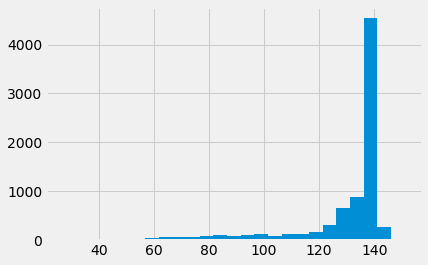

In [10]:
# Let's see the length of the tweets
seq_length = [len(i) for i in df['text']]

pd.Series(seq_length).hist(bins = 25)

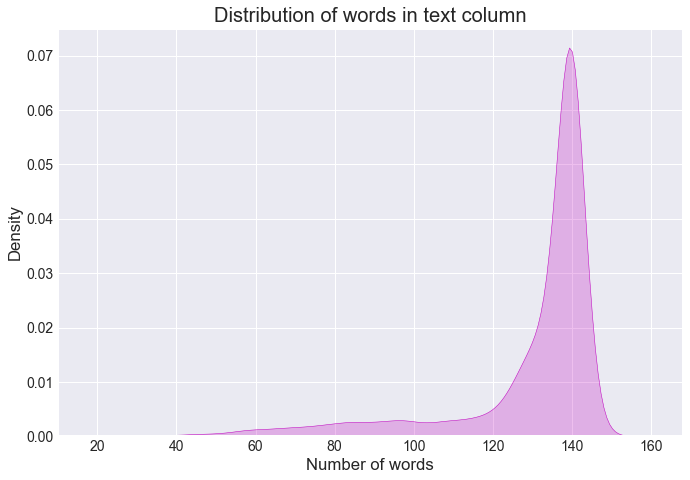

In [11]:

sns.set_style('darkgrid')

df["num of words in text"] = df["text"].apply(lambda x: len(x))
plt.figure(figsize=(10,7))
sns.kdeplot(df["num of words in text"],shade=True, color='m')
plt.title("Distribution of words in text column")
plt.xlabel("Number of words")
plt.show()

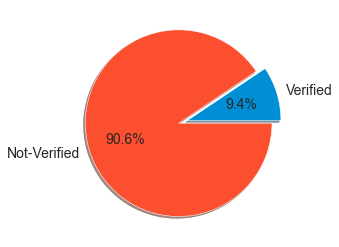

In [12]:
# Percentage of Verified and Non-verified users

dict_ = df['user_verified'].value_counts().to_dict()
dict_['Verified'] = dict_.pop(True)
dict_['Not-Verified'] = dict_.pop(False)

plt.figure(figsize=(4,4))
plt.pie(x=dict_.values(), labels=dict_.keys(), autopct='%1.1f%%', shadow=True, startangle=0, explode = [0.1, 0])
plt.show()

We can See that nearly 91% of users tweeted are not verified

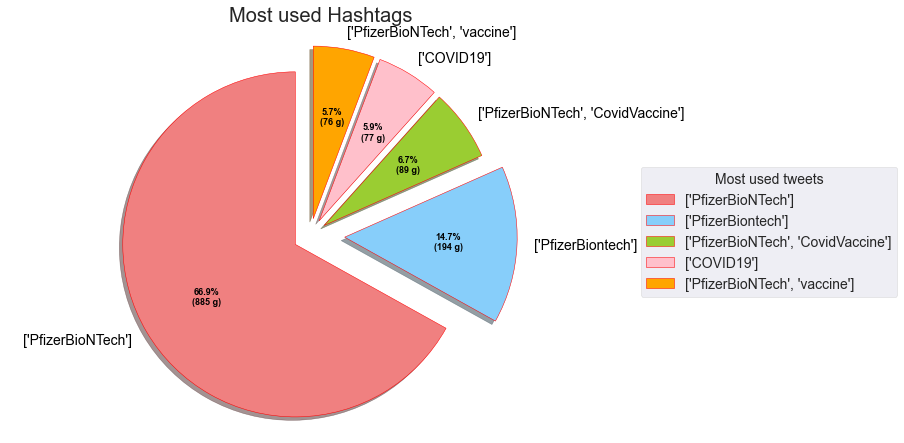

In [13]:
# Top 10 Most Used Hashtags in tweets

MostUsedTweets = df.hashtags.value_counts().sort_values(ascending=False)[:5]
colors = ['lightcoral', 'lightskyblue', 'yellowgreen', 'pink', 'orange']
explode = (0.1, 0.2, 0.1, 0.1, 0.1) 

# Wedge properties 
wp = { 'linewidth' : 0.5, 'edgecolor' : "red" }

# Creating autocpt arguments 
def func(pct, allvalues): 
    absolute = int(pct / 100.*np.sum(allvalues)) 
    return "{:.1f}%\n({:d} g)".format(pct, absolute) 
  
# Creating the plot 
fig, ax = plt.subplots(figsize =(10, 7)) 
wedges, texts, autotexts = ax.pie(MostUsedTweets,  
                                  autopct = lambda pct: func(pct, MostUsedTweets), 
                                  explode = explode,  
                                  labels = MostUsedTweets.keys(), 
                                  shadow = True, 
                                  colors = colors, 
                                  startangle = 90, 
                                  wedgeprops = wp, 
                                  textprops = dict(color ="black")) 
  
# Adding legend 
ax.legend(wedges, MostUsedTweets.keys(), 
          title ="Most used tweets", 
          loc ="center left", 
          bbox_to_anchor =(1, 0, 0.5, 1)) 


plt.setp(autotexts, size=9, weight="bold") 
ax.set_title("Most used Hashtags") 
plt.axis('equal')
plt.show()

In [14]:
# Number of Tweets Made Per Day

df['tweet_date']=pd.to_datetime(df['date']).dt.date
tweet_date=df['tweet_date'].value_counts().to_frame().reset_index().rename(columns={'index':'date','tweet_date':'count'})
tweet_date['date']=pd.to_datetime(tweet_date['date'])
tweet_date=tweet_date.sort_values('date',ascending=False)

fig=go.Figure(go.Scatter(x=tweet_date['date'],
                                y=tweet_date['count'],
                               mode='markers+lines',
                               name="Submissions",
                               marker_color='dodgerblue'))

fig.update_layout(
    title_text='Tweets per Day : ({} - {})'.format(df['tweet_date'].sort_values()[0].strftime("%d/%m/%Y"),
                                                       df['tweet_date'].sort_values().iloc[-1].strftime("%d/%m/%Y")),template="plotly_dark",
    title_x=0.5)

fig.show()

It can be seen that the tweets related to the vaccine were more during the initial phases of the vaccine launch.

*If The Plot not appeared when viewed in github (due to some github bug) without downloading the notebook then please check the plot attached as 'Tweets_per_Day.png' with this notebook*

<AxesSubplot:title={'center':'Day with maximun tweets'}, xlabel='day', ylabel='count'>

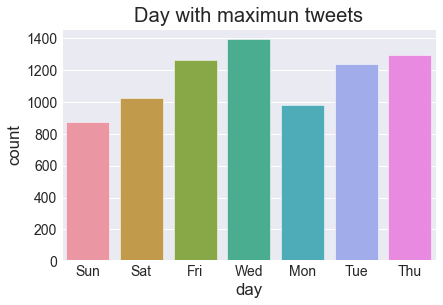

In [15]:
#Days With Maximum Number of Tweets

df["date"] = pd.to_datetime(df["date"])
df["Month"] = df["date"].apply(lambda x : x.month)
df["day"] = df["date"].apply(lambda x : x.dayofweek)
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df["day"] = df["day"].map(dmap)
plt.title("Day with maximun tweets")
sns.countplot(df["day"])

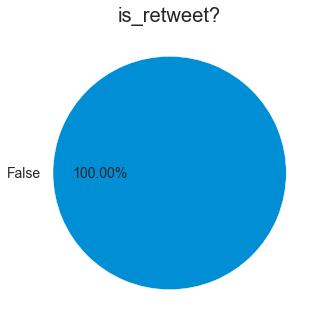

In [16]:
#Number of Retweets Made

y = df['is_retweet']
fig, ax = plt.subplots(figsize=(5, 5))
count = Counter(y)
ax.pie(count.values(), labels=count.keys(), autopct=lambda p:f'{p:.2f}%')
ax.set_title('is_retweet?')
plt.show()

# No retweets were made.

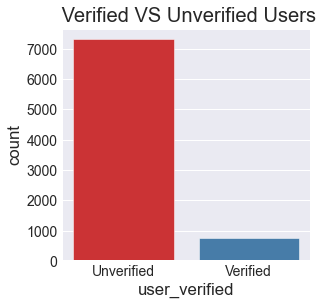

In [17]:
#Numer of verified and non verified users tweeted.

plt.figure(figsize=(4, 4))
sns.countplot(x ="user_verified",data=df, palette="Set1")
plt.title(" Verified VS Unverified Users")
plt.xticks([False,True],['Unverified','Verified'])
plt.show()

# 3.Text Preprocessing <a id='2'></a>
## Processing the raw tweets using regex

**Text Preprocessing** is traditionally an important step for Natural Language Processing (NLP) tasks. It transforms text into a more digestible form so that machine learning algorithms can perform better.

The Preprocessing steps taken are:

**Conert to lowerCase**:Convert all the tweets to lowercase
**Removing Twitter Handles**: Remove the twitter handles (i.e the usernames) <br>
**Remove Twitter Hashtags** : Remove all the hashtags from the tweet<br>
**Remove URL**: Remove the url's present in the tweet. <br>
**Removing Non-Alphabets**: Replacing characters except Digits and Alphabets with a space.<br>
**Removing Short Words**: Words with length less than 2 are removed.<br>
**Removing Consecutive letters**: 3 or more consecutive letters are replaced by 2 letters. (eg: "Heyyyy" to "Heyy")<br>
**Removing Multiple Spaces**: Replace all multiple spaces with single space.



In [18]:
#Convert to lowercase
df.text = df['text'].str.lower()

#remove twitter handlers
df.text = df.text.apply(lambda x:re.sub('@[^\s]+','',x))

#remove hashtags
df.text = df.text.apply(lambda x:re.sub(r'\B#\S+','',x))

# Remove URLS
df.text = df.text.apply(lambda x:re.sub(r"http\S+", "", x))

# Replace all non alphabets.
df.text = df.text.apply(lambda x:re.sub("[^a-zA-Z0-9]", ' ', x))

#Remove all single characters
df.text = df.text.apply(lambda x:re.sub(r'\s+[a-zA-Z]\s+', '', x))

# Substituting multiple spaces with single space
df.text = df.text.apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))

# Replace 3 or more consecutive letters by 2 letter.
df.text = df.text.apply(lambda x:re.sub(r"(.)\1\1+",r"\1\1", x))


# 4. Most Prevalent Words in Tweet <a id='3'></a>

In [19]:
stopwords = set(STOPWORDS)
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='black',
        stopwords=stopwords,
        max_words=100,
        max_font_size=40, 
        scale=5,
        random_state=1
    ).generate(str(data))

    fig = plt.figure(1, figsize=(10,10))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

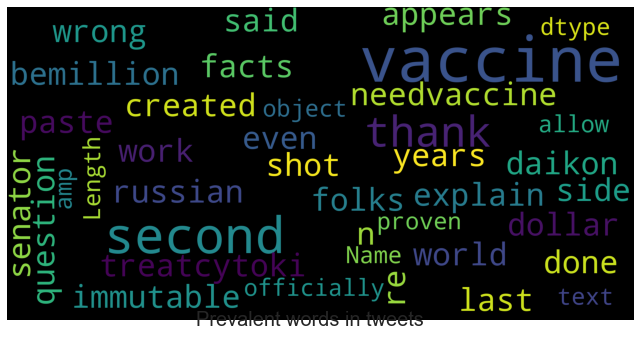

In [20]:
show_wordcloud(df['text'], title = 'Prevalent words in tweets')

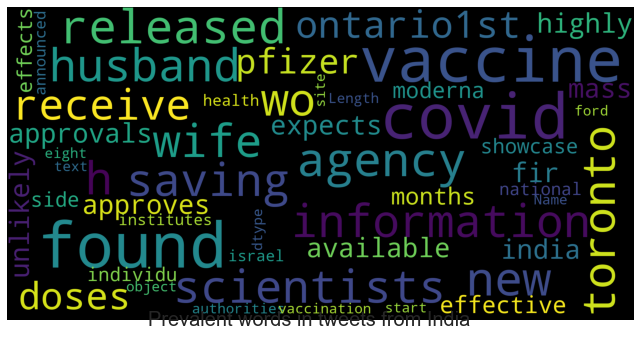

In [21]:
india_df = df.loc[df.user_location=="India"]
show_wordcloud(india_df['text'], title = 'Prevalent words in tweets from India')

# 5. Apply VADER Sentiment to the tweets to get labels <a id='4'></a>

The **VADER Sentimental** analysis module is
used to label the example / datapoint as the
positive, negative or neutral . VADER
sentimental analysis relies on a dictionary that
maps lexical features to emotion intensities
known as sentiment scores. The sentiment score
of a text can be obtained by summing up each
word's intensity in the text.
For example,- Words like 'love,' 'enjoy,' 'happy,'
'like' all convey a positive sentiment. Also,
VADER is intelligent enough to understand these
words' basic context, such as "did not love" as a
negative statement. It also understands the
emphasis of capitalization and punctuation, such
as "ENJOY."

In [22]:
data = df.fillna('')

Neutral     3479
Positive    3210
Negative    1393
Name: Sentiment, dtype: int64


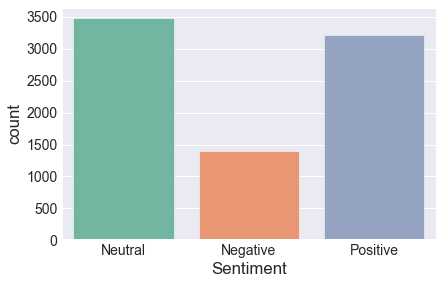

In [23]:
sentiment = SIA()
def get_sentiment(data):
    sentiment_list = []
    for text in list(data['text'].values):
        if sentiment.polarity_scores(text)["compound"] > 0:
            sentiment_list.append("Positive")
        elif sentiment.polarity_scores(text)["compound"] < 0:
            sentiment_list.append("Negative")
        else:
            sentiment_list.append("Neutral")
    return sentiment_list
        
data['Sentiment'] = get_sentiment(data)
sns.countplot(x="Sentiment", data=data, palette="Set2")
print(data.Sentiment.value_counts())

In [24]:
temp = data.groupby('Sentiment').count()['text'].reset_index().sort_values(by='text',ascending=False)
temp.style.background_gradient(cmap='Greens')

In [25]:
plt.figure(figsize=(12,6))

fig = go.Figure(go.Funnelarea(
    text =temp.Sentiment,
    values = temp.text,
    title = {"position": "top center", "text": "Funnel-Chart of Sentiment Distribution"}
    ))
fig.show()

<Figure size 864x432 with 0 Axes>

*If The Plot not appeared when viewed in github (due to some github bug) without downloading the notebook then please check the plot attached as 'Funnel_chart.png' with this notebook*

In [26]:
def get_word_cloud(sentiment):
    stop_words = (set(stopwords.words('english')))
    remove_words = ['vaccin', 'pfizerbiontech', 'coronavirus', 'pfizer', 'covid', 'covidvaccin', 'pfizervaccin']
    stop_words = remove_words + list(stop_words)
    plt.figure(figsize=[15,15])
    clean_tweets= "".join(list(data[data['Sentiment']==sentiment]['Tidy Tweet'].values))
    wordcloud = WordCloud(width=700,height=400, background_color='white',colormap='plasma', max_words=50, stopwords=stop_words, collocations=False).generate(clean_tweets)
    plt.title(f"Top 50 {sentiment} words used in tweets", fontsize=20)
    plt.imshow(wordcloud)
    return plt.show()

<AxesSubplot:title={'center':'Tweet count over a period of time'}, xlabel='Date', ylabel='Count'>

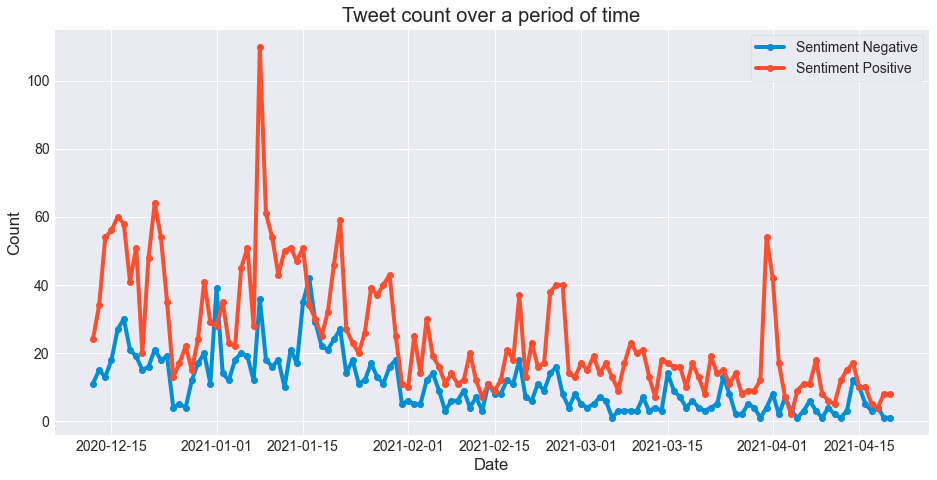

In [27]:
# Type of tweets made on vaccine over a period of time
data['date'] = pd.to_datetime(data['date']).dt.date
negative_data = data[data['Sentiment']=='Negative'].reset_index()
positive_data = data[data['Sentiment']=='Positive'].reset_index()
grouped_data_neg = negative_data.groupby('date')['Sentiment'].count().reset_index()
grouped_data_pos = positive_data.groupby('date')['Sentiment'].count().reset_index()
merged_data = pd.merge(grouped_data_neg, grouped_data_pos, left_on='date', right_on='date', suffixes=(' Negative', ' Positive'))

merged_data.plot(x='date', y=['Sentiment Negative', 'Sentiment Positive'], figsize=(14, 7), marker='o', xlabel='Date', ylabel='Count', title='Tweet count over a period of time')

Here We Observe that the there were More tweets when the vaccine was released and the number of tweets about vaccine decreases as the time goes on

In [28]:
# Get the Positive, Neutral and Negative Sentiment Scores
sid = SIA()
data['sentiments']           = data['text'].apply(lambda x: sid.polarity_scores(' '.join(re.findall(r'\w+',x.lower()))))
data['Positive Sentiment']   = data['sentiments'].apply(lambda x: x['pos']+1*(10**-6)) 
data['Neutral Sentiment']    = data['sentiments'].apply(lambda x: x['neu']+1*(10**-6))
data['Negative Sentiment']   = data['sentiments'].apply(lambda x: x['neg']+1*(10**-6))

data.drop(columns=['sentiments'],inplace=True)

In [29]:
data.head(3)

user_name              user_location  \
0   Rachel Roh  La Crescenta-Montrose, CA   
1  Albert Fong          San Francisco, CA   
2     eli🇱🇹🇪🇺👌                   Your Bed   

                                    user_description  user_followers  \
0  Aggregator of Asian American news; scanning di...             405   
1  Marketing dude, tech geek, heavy metal & '80s ...             834   
2                                     heil, hydra 🖐☺              10   

   user_friends  user_favourites  user_verified        date  \
0          1692             3247          False  2020-12-20   
1           666              178          False  2020-12-13   
2            88              155          False  2020-12-12   

                                                text  \
0  same folks said daikon paste could treatcytoki...   
1  while the world has been on the wrong side of ...   
2      russian vaccine is created to last 2 4 years    

                                            hashtags  ... favorites  \
0                                 ['PfizerBioNTech']  ...         0   
1                                                     ...         1   
2  ['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...  ...         0   

   is_retweet  num of words in text  tweet_date  Month  day  Sentiment  \
0       False                    97  2020-12-20     12  Sun    Neutral   
1       False                   140  2020-12-13     12  Sun   Negative   
2       False                   140  2020-12-12     12  Sat   Positive   

  Positive Sentiment Neutral Sentiment  Negative Sentiment  
0           0.000001          1.000001            0.000001  
1           0.109001          0.766001            0.125001  
2           0.250001          0.750001            0.000001  

[3 rows x 22 columns]

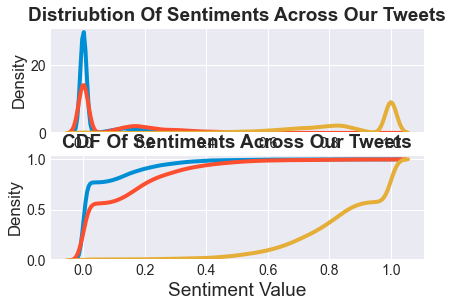

In [30]:
#Distribution Of Sentiments across the tweets

plt.subplot(2,1,1)
plt.title('Distriubtion Of Sentiments Across Our Tweets',fontsize=19,fontweight='bold')
sns.kdeplot(data['Negative Sentiment'],bw=0.1)
sns.kdeplot(data['Positive Sentiment'],bw=0.1)
sns.kdeplot(data['Neutral Sentiment'],bw=0.1)
plt.subplot(2,1,2)
plt.title('CDF Of Sentiments Across Our Tweets',fontsize=19,fontweight='bold')
sns.kdeplot(data['Negative Sentiment'],bw=0.1,cumulative=True)
sns.kdeplot(data['Positive Sentiment'],bw=0.1,cumulative=True)
sns.kdeplot(data['Neutral Sentiment'],bw=0.1,cumulative=True)
plt.xlabel('Sentiment Value',fontsize=19)
plt.show()

In [31]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
from wordcloud import WordCloud,STOPWORDS
from nltk.corpus import stopwords
import random
plt.rc('figure',figsize=(17,13))

# Get Wordclouds For Positive and Negative Tweets

def get_word_cloud(sentiment):
    stop_words = (set(stopwords.words('english')))
    remove_words = ['vaccin', 'pfizerbiontech', 'coronavirus', 'pfizer', 'covid', 'covidvaccin', 'pfizervaccin']
    stop_words = remove_words + list(stop_words)
    plt.figure(figsize=[10,10])
    clean_tweets= "".join(list(data[data['Sentiment']==sentiment]['text'].values))
    wordcloud = WordCloud(width=700,height=400, background_color='white',colormap='plasma', max_words=50, stopwords=stop_words, collocations=False).generate(clean_tweets)
    plt.title(f"Top 50 {sentiment} words used in tweets", fontsize=20)
    plt.imshow(wordcloud)
    return plt.show()

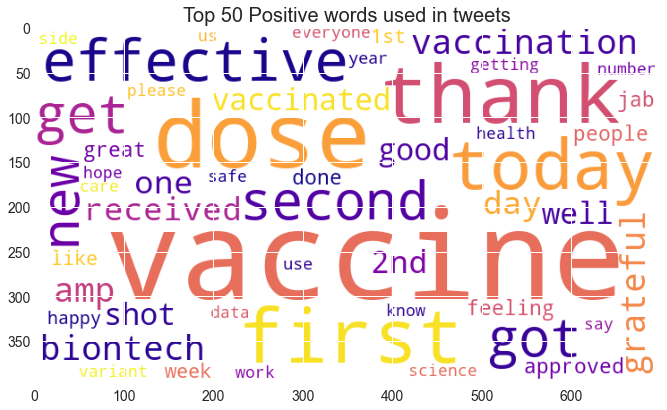

In [32]:
get_word_cloud(sentiment='Positive')

Here we can see that the words: **dose, vaccine, thank, good, first etc..** contribute towards Positive Sentiment

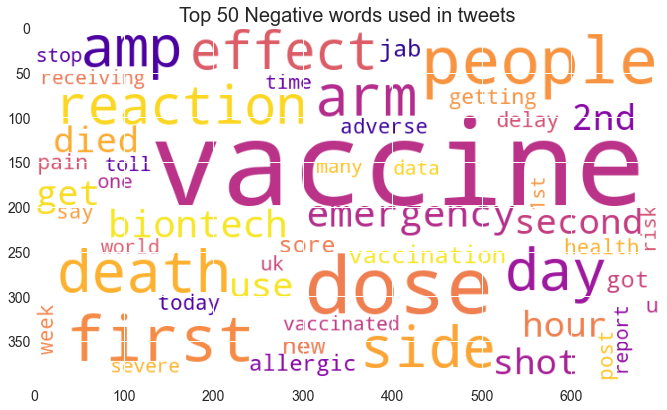

In [33]:
get_word_cloud(sentiment='Negative')

Here we can see that the words: **death,died,pain,stop etc..** contribute towards Negative Sentiment

# 6. Time Series Analysis On Sentiments <a id='5'></a>

In [34]:

b_date_mean = data.groupby(by='date').mean().reset_index()
b_date_std = data.groupby(by='date').std().reset_index()


fig = make_subplots(rows=2, cols=1,shared_xaxes=True,subplot_titles=('Daily Average Positive Sentiment',  'Daily Average Negative Sentiment'))

fig.add_trace(
    go.Scatter(x=b_date_mean['date'], y=b_date_mean['Positive Sentiment'],name='Positive Sentiment Mean'),
    row=1, col=1
)

    
#positive mean
fig.add_shape(type="line",
    x0=b_date_mean['date'].values[0], y0=b_date_mean['Positive Sentiment'].mean(), x1=b_date_mean['date'].values[-1], y1=b_date_mean['Positive Sentiment'].mean(),
    line=dict(
        color="Red",
        width=2,
        dash="dashdot",
    ),
        name='Mean'
)

fig.add_annotation(x=b_date_mean['date'].values[3], y=b_date_mean['Positive Sentiment'].mean(),
            text=r"$\mu : {:.2f}$".format(b_date_mean['Positive Sentiment'].mean()),
            showarrow=True,
            arrowhead=3,
            yshift=10)



fig.add_trace(
    go.Scatter(x=b_date_mean['date'], y=b_date_mean['Negative Sentiment'],name='Negative Sentiment Mean'),
    row=2, col=1
)

#negative mean
fig.add_shape(type="line",
    x0=b_date_mean['date'].values[0], y0=b_date_mean['Negative Sentiment'].mean(), x1=b_date_mean['date'].values[-1], y1=b_date_mean['Negative Sentiment'].mean(),
    line=dict(
        color="Red",
        width=2,
        dash="dashdot",
    ),
        name='Mean',
        xref='x2', 
        yref='y2'
)

fig.add_annotation(x=b_date_mean['date'].values[3], y=b_date_mean['Negative Sentiment'].mean(),
            text=r"$\mu : {:.2f}$".format(b_date_mean['Negative Sentiment'].mean()),
            showarrow=True,
            arrowhead=3,
            yshift=10,
            xref='x2', 
            yref='y2')



fig.add_annotation(x=b_date_mean['date'].values[5], y=b_date_mean['Negative Sentiment'].mean()+0.01,
            text=r"Start Of Decline",
            showarrow=True,
            arrowhead=6,
            yshift=10,
            xref='x2', 
            yref='y2')

fig.add_annotation(x=b_date_mean['date'].values[15], y=.024,
            text=r"Start Of Incline",
            showarrow=True,
            arrowhead=6,
            yshift=10,
            xref='x2', 
            yref='y2')

fig['layout']['xaxis2']['title'] = 'Date'
fig.update_layout(height=700, width=900, title_text="Sentiment Average Change With Time")
fig.show()




Here we can see that the there is no trend or cycles or seasonality observed with Time in Positive and Negative Sentiments of tweets. So we can conclude that **time series analysis on Sentiments is pointless**

*If The Plot not appear when viewed in github without downloading then please check the plot attached as 'Sentiment_Average_Change_With_Time.png' with this notebook*

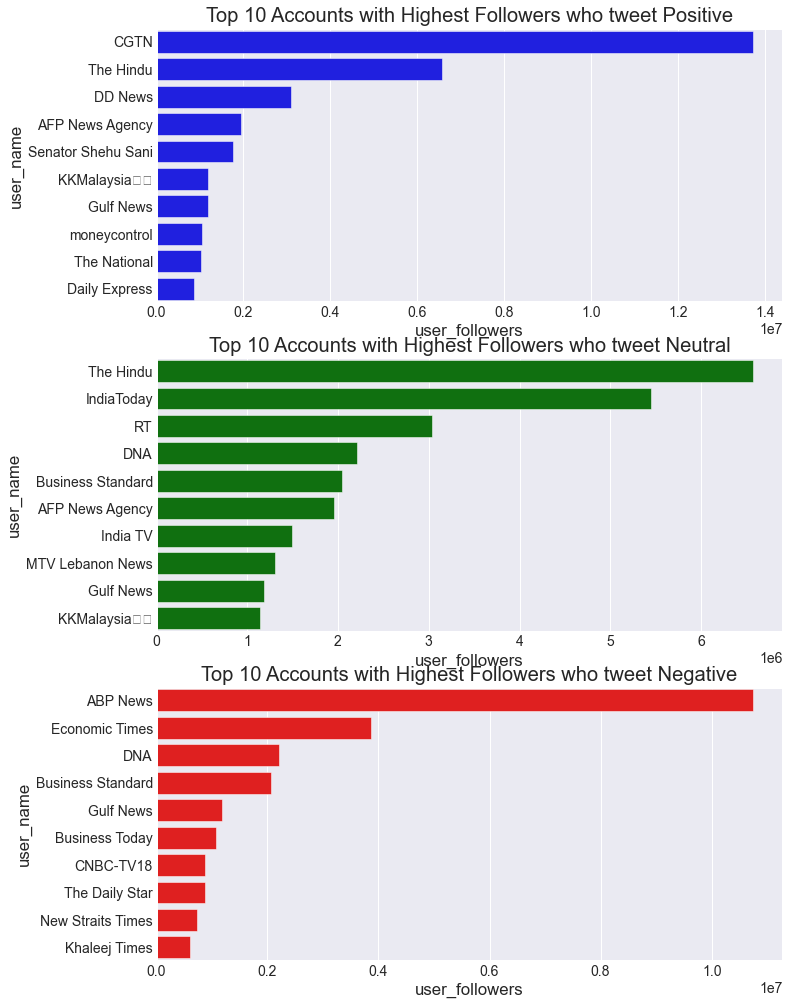

In [35]:
# Check the most followed (famous) users tweet

fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(10, 16))
sns.barplot(x="user_followers", y="user_name", orient="h", ax=ax1, palette=["b"],
           data=data[(data.Sentiment== "Positive")]\
           .drop_duplicates(subset=["user_name"])\
           .sort_values(by=["user_followers"], ascending=False)[["user_name", "user_followers"]][:10])
ax1.set_title('Top 10 Accounts with Highest Followers who tweet Positive')
sns.barplot(x="user_followers", y="user_name", orient="h", ax=ax2, palette=["g"],
           data=data[(data.Sentiment == "Neutral")]
           .drop_duplicates(subset=["user_name"])\
           .sort_values(by=["user_followers"], ascending=False)[["user_name", "user_followers"]][:10])
ax2.set_title('Top 10 Accounts with Highest Followers who tweet Neutral')
sns.barplot(x="user_followers", y="user_name", orient="h", ax=ax3, palette=["r"],
           data=data[(data.Sentiment == "Negative")]
           .drop_duplicates(subset=["user_name"])\
           .sort_values(by=["user_followers"], ascending=False)[["user_name", "user_followers"]][:10])
ax3.set_title('Top 10 Accounts with Highest Followers who tweet Negative')

fig.show()

As, its obvious that verified users or media channels make a significant impact on people. <br>
ABP news, Economic Times, Business Standard which are most famous media channels tweeted negatively about the vaccine. while, the news channels Hindu, DD news, CGTN tweeted positively

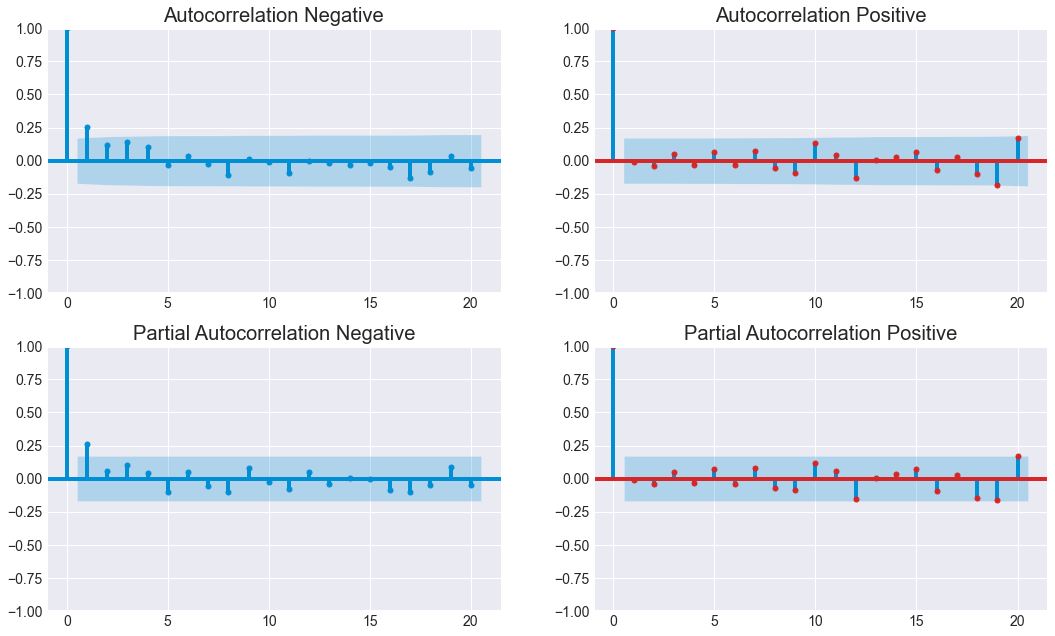

In [36]:
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose


f, ax = plt.subplots(nrows=2, ncols=2, figsize=(16, 10))
ax[0,0].set_ylim(-1.1,1.1)
ax[1,0].set_ylim(-1.1,1.1)
ax[0,1].set_ylim(-1.1,1.1)
ax[1,1].set_ylim(-1.1,1.1)

plot_acf(b_date_mean['Negative Sentiment'],lags=20, ax=ax[0,0],title='Autocorrelation Negative')
plot_pacf(b_date_mean['Negative Sentiment'],lags=20, ax=ax[1,0],title='Partial Autocorrelation Negative')
plot_acf(b_date_mean['Positive Sentiment'],lags=20, ax=ax[0,1],color='tab:red',title='Autocorrelation Positive')
plot_pacf(b_date_mean['Positive Sentiment'],lags=20, ax=ax[1,1],color='tab:red',title='Partial Autocorrelation Positive')
plt.show()

Here, from graphs we can observe that the acf and pacf values for positive and negative sentiments are nearly zero and there is no exponential decrease in acf and pacf plots. Hence, the p and q values are 0. Hence using time series forecating models like ARMA or ARIMA doesn't make any sense.

# 7.Stop Word Removal and Lemmatization <a id='6'></a>

In [37]:
df = data[['Sentiment','text']]
              

In [38]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

# Make Sure your intenrt is on :) 
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

df['text'] = df['text'].apply(word_tokenize)
df.replace({'Negative': 0, 'Neutral':1 ,'Positive': 2}, inplace=True)

# Encoding 0 for negative, 1 for Neutral, 2 for Positive 

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


**Removing Stopwords**: Stopwords are the English words which does not add much meaning to a sentence. They can safely be ignored without sacrificing the meaning of the sentence. (eg: "the", "he", "have")

In [39]:
stop = set(stopwords.words('english'))
df['text'] = df['text'].apply(lambda x: [item for item in x if item not in stop])

**Lemmatizing**: Lemmatization is the process of converting a word to its base form. (e.g: “Great” to “Good”)

In [40]:
lemmatizer = WordNetLemmatizer()
def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in text]
df['text'] = df.text.apply(lemmatize_text)


# 8. Splitting the Data <a id='7'></a>

The Preprocessed Data is divided into 2 sets of data:

**Training Data**: The dataset upon which the model would be trained on. Contains 95% data.
**Test Data**: The dataset upon which the model would be tested against. Contains 5% data.

In [41]:
X = df['text']
y = df['Sentiment']


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.05, random_state=42)

In [42]:
X_train,X_test,y_train,y_test = X_train.astype(str),X_test.astype(str),y_train.astype(str),y_test.astype(str)

#  9. Feature Extraction <a id='8'></a>

**TF-IDF** indicates what the importance of the word is in order to understand the document or dataset. Let us understand with an example. Suppose you have a dataset where students write an essay on the topic, My House. In this dataset, the word a appears many times; it’s a high frequency word compared to other words in the dataset. The dataset contains other words like home, house, rooms and so on that appear less often, so their frequency are lower and they carry more information compared to the word. This is the intuition behind TF-IDF.

**TF-IDF Vectoriser** converts a collection of raw documents to a **matrix of TF-IDF features**. The Vectoriser is usually trained on only the X_train dataset.

**ngram_range** is the range of number of words in a sequence. (e.g "very expensive" is a 2-gram that is considered as an extra feature separately from "very" and "expensive" when you have a n-gram range of (1,2))

**max_features** specifies the number of features to consider. (Ordered by feature frequency across the corpus)

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)
print(f'Vectoriser fitted.')
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

Vectoriser fitted.
No. of feature_words:  45197


In [44]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)
print(f'Data Transformed.')

Data Transformed.


# 10. Model Building  <a id='9'></a>

We're creating **4 different types** of model for our sentiment analysis problem:

**i) Logistic Regression<br>
ii) Naive Bayes<br>
iii) Linear Support Vector Classification (LinearSVC)<br>
iv) Random forest**<br>

Since our dataset **skewed**, i.e. it has no equal number of Positive and Negative Predictions. We're choosing **F1-Score** as our evaluation metric. Furthermore, we're plotting the **Confusion Matrix** to get an understanding of how our model is performing on different classification types.

In [45]:
# Evaluate Model Function

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

def model_Evaluate(model):
    
    # Predict values for Test dataset
    y_pred = model.predict(X_test)

    # Print the evaluation metrics for the dataset.
    print('\033[1m'+'\t\t\tClassification Report'+'\033[0m')
    print(classification_report(y_test, y_pred))
    
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    sns.set(rc = {'figure.figsize':(8,8)})
    categories = ['Negative','Neutral','Positive']
    sns.heatmap(cf_matrix, annot=True,fmt='d',xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

## 10.1 Logistic Regression <a id='9.1'></a>


**Logistic regression**, by default, is limited to two-class classification problems. Some extensions like one-vs-rest can allow logistic regression to be used for multi-class classification problems, although they require that the classification problem first be transformed into multiple binary classification problems.

Instead, the **multinomial logistic regression** algorithm is an extension to the logistic regression model that involves changing the loss function to cross-entropy loss and predict probability distribution to a multinomial probability distribution to natively support multi-class classification problems.

			Classification Report
              precision    recall  f1-score   support

           0       0.93      0.51      0.66        72
           1       0.75      0.90      0.82       178
           2       0.84      0.82      0.83       155

    accuracy                           0.80       405
   macro avg       0.84      0.75      0.77       405
weighted avg       0.82      0.80      0.80       405



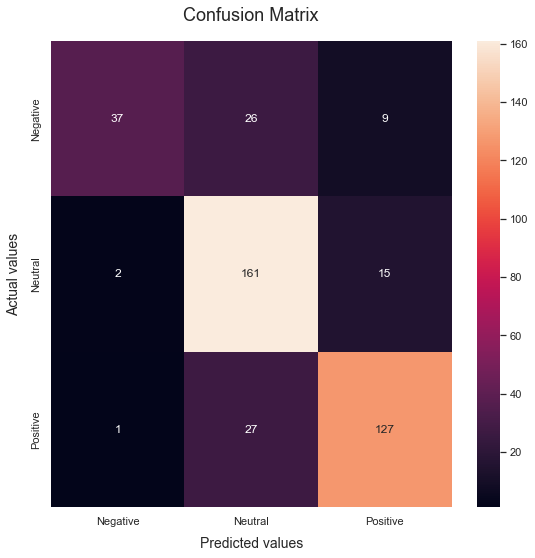

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
clf = LogisticRegression(random_state=0,max_iter=1000).fit(X_train, y_train)
model_Evaluate(clf)


## 10.2 Naive Bayes <a id='9.2'></a>

In statistics, naive Bayes classifiers are a family of simple "probabilistic classifiers" based on applying Bayes' theorem with strong (naïve) independence assumptions between the features (see Bayes classifier). They are among the simplest Bayesian network models,but coupled with kernel density estimation, they can achieve higher accuracy levels

			Classification Report
              precision    recall  f1-score   support

           0       0.91      0.14      0.24        72
           1       0.74      0.84      0.79       178
           2       0.69      0.85      0.76       155

    accuracy                           0.72       405
   macro avg       0.78      0.61      0.60       405
weighted avg       0.75      0.72      0.68       405



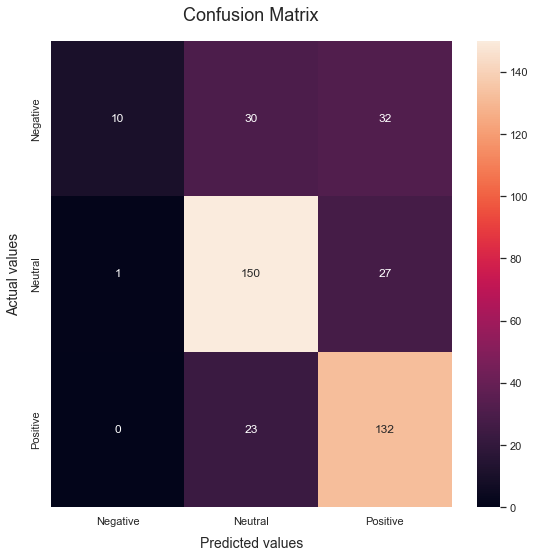

In [47]:
from sklearn.naive_bayes import MultinomialNB
BNBmodel = MultinomialNB()
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)



## 10.3 Linear Support Vector Classifier <a id='9.3'></a>

**Support Vector Classifier or SVC** is one of the most popular Supervised Learning algorithms, which is used for Classification as well as Regression problems. However, primarily, it is used for Classification problems in Machine Learning.

The goal of the SVC algorithm is to create the best line or decision boundary that can segregate n-dimensional space into classes so that we can easily put the new data point in the correct category in the future. This best decision boundary is called a hyperplane.

			Classification Report
              precision    recall  f1-score   support

           0       0.86      0.61      0.72        72
           1       0.81      0.92      0.86       178
           2       0.86      0.85      0.85       155

    accuracy                           0.83       405
   macro avg       0.84      0.79      0.81       405
weighted avg       0.84      0.83      0.83       405



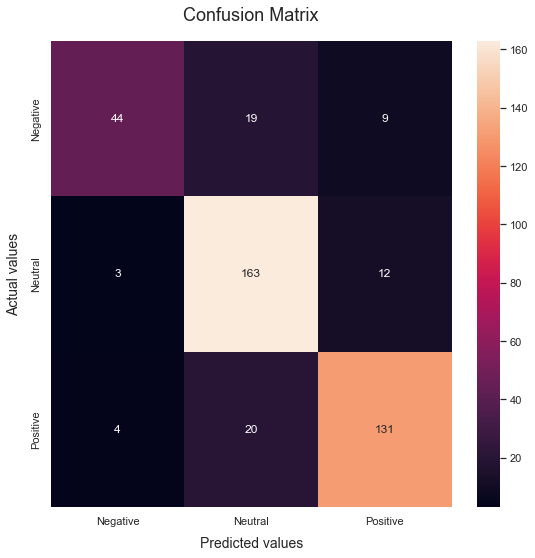

In [48]:
from sklearn.svm import LinearSVC
SVCmodel = LinearSVC()

SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)


## 10.4 RandomForestClassifier  <a id='9.4'></a>

A **random forest** is a machine learning technique that’s used to solve regression and classification problems. It utilizes **ensemble learning**, which is a technique that combines many classifiers to provide solutions to complex problems.

A random forest algorithm consists of many decision trees. The ‘forest’ generated by the random forest algorithm is trained through bagging or bootstrap aggregating. **Bagging** is an ensemble meta-algorithm that improves the accuracy of machine learning algorithms.

The (random forest) algorithm establishes the outcome based on the predictions of the decision trees. It predicts by taking the average or mean of the output from various trees. Increasing the number of trees increases the precision of the outcome.

			Classification Report
              precision    recall  f1-score   support

           0       0.92      0.47      0.62        72
           1       0.72      0.98      0.83       178
           2       0.90      0.74      0.81       155

    accuracy                           0.80       405
   macro avg       0.85      0.73      0.76       405
weighted avg       0.83      0.80      0.79       405



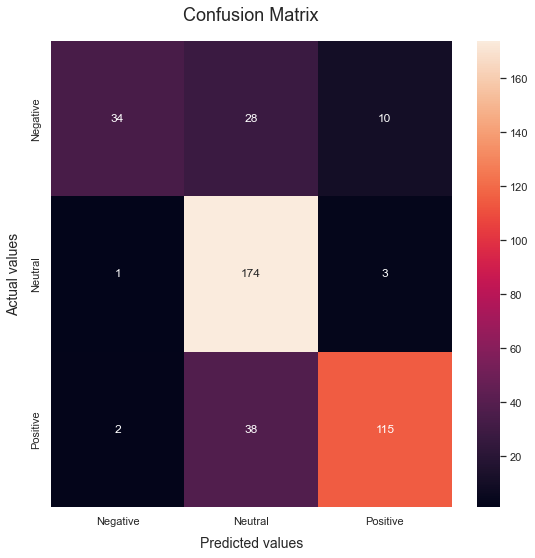

In [49]:
from sklearn.ensemble import RandomForestClassifier
random_model = RandomForestClassifier(max_depth=500,random_state=0)
random_model.fit(X_train, y_train)
model_Evaluate(random_model)

# 11. Conclusion <a id='10'></a>

We can clearly see that the **Support Vector Classifier** Model performs the best out of all the different models that we tried. It achieves nearly 83% accuracy and F1-Score's **72%,76%,85%** while classifying the sentiment of a tweet.

Although **Logistic Regression and Random Forest Classifiers** has nearly same accuracy (80%) as SVC the overall F1 scores are better for SVC 